# FAKE NEWS DETECTION PROJECT

### Loading the dataset 

In [1]:
import pandas as pd

df = pd.read_csv("fake_news_kaggle/train.csv")
df.dropna(inplace = True)

In [2]:
print("Shape of News data:", df.shape)
print("News data columns", df.columns)

Shape of News data: (18285, 5)
News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [3]:
display(df)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


0    10361
1     7924
Name: label, dtype: int64


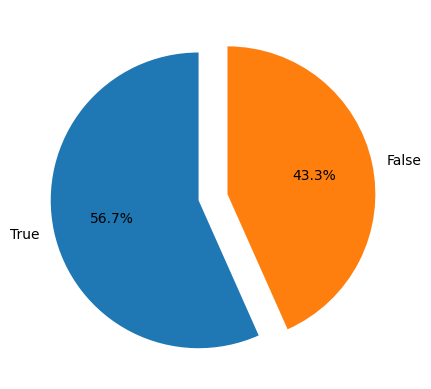

In [4]:
import matplotlib.pyplot as plt

print(df.label.value_counts())
plt.pie(df.label.value_counts(),labels=["True","False"],autopct='%1.1f%%',explode =[0.2,0], startangle=90)
plt.show()

In [5]:
text=df.title+" "+df.author+" "+df.text

print(text[0])

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of t

In [6]:
text_length = text.str.split().str.len()
text_length.describe()

count    18285.000000
mean       818.056440
std        886.831104
min          4.000000
25%        318.000000
50%        625.000000
75%       1110.000000
max      24245.000000
dtype: float64

In [7]:
percentile25 = text_length.quantile(.1)
percentile75 = text_length.quantile(.99)
print(percentile75)

4161.32


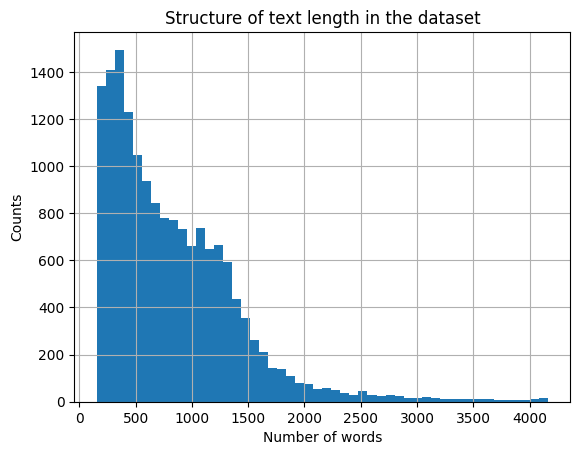

In [8]:
plt.hist(text_length,bins=50,range=(percentile25, percentile75))
plt.ylabel('Counts')
plt.xlabel('Number of words')
plt.title('Structure of text length in the dataset')
plt.grid(True)
plt.show()

### Cleaning data

In [9]:
text = text.str.replace('[^\w\s]','')

C:\Users\Norbix\AppData\Local\Temp\ipykernel_3656\2434945836.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('[^\w\s]','')


In [10]:
text = text.str.lower()

In [11]:
for index,line in text.items():
    text[index]=line.split()

In [12]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
tekst=text

for i,row in tekst.items():
   for id,word in enumerate(row):
        if word not in stopwords:
            ez[i]=word


AttributeError: module 'pandas' has no attribute 'Dataframe'